In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Section 6.1 2 Networks 
This section we need to 
1. create a graph
2. print out the `number of nodes` and `number of edges`
3. check the edges in the graph
4. print out the corresponding adjacency matrix
5. print out the `A == A.T`. If `A == A.T`, it means that the matrix is symmetric.


In [2]:
# 1. create a graph
G=nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)

# 2. print out & 3. check the edges
print('#Node: %i, #Edge: %i' % (G.number_of_nodes(), G.number_of_edges()))
print('Has 3-4 edge: %s' % G.has_edge(3,4))

G.add_nodes_from(range(1,7))

# 4. print out the corresponding adjacency matrix
print(nx.to_numpy_array(G).T)

# 5. print out the A==A.T
A = nx.to_numpy_array(G).T
A==A.T


#Node: 3, #Edge: 2
Has 3-4 edge: False
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

### Section 6.3 Weighted Networks
1. add weight to edges and print the adjacency matrix

In [3]:
# 1. add weights to edges
G2=nx.Graph()
G2.add_edge(1,2, weight=3)
G2.add_edge(2,3,weight=2)
print(G2[2])
print(nx.to_numpy_array(G2).T)



{1: {'weight': 3}, 3: {'weight': 2}}
[[0. 3. 0.]
 [3. 0. 2.]
 [0. 2. 0.]]


### Section 6.4 Directed networks
1. create directed graph

In [4]:
# 1. directed graph, compared it to the book graph 6.2 in chapter 6.4
Di = nx.DiGraph()
Di.add_edges_from([(3,1), (2,3), (6,2),(5,6),(4,6),(5,4),(1,4),(3,5)])
print(nx.to_numpy_array(Di).T)

[[0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]]


### The equation of the cocitation network is

$$ C_{ij} = \sum^n_{k=1} A_{ik} A_{jk} $$

### Section 6.4.1 Cocitation network
In this case we need to write a function to generate the cocitation network.
To answer questions in lab1:
1. _the sum should be zero but not, what did we miss?_
    In the beginning, I failed to generate zeros but I realized that we need to consider the `weight` of each edges into our network.
2. _Meaning of the neighbors for `Lienar Combination`? Print both_
    

In [5]:
### 1. write down the function
# Read the gml file
G = nx.read_gml("./proofwikidefs_la.gml", 'name')
# print(G.adj)

def network_similarity(G, mode="co"):
    """ 
    The algorithm to compute the network similarity (cocitation network, bibliographic network) based on graphical approach. 
    By graphical approach, which means that we need to use networkx package to compute the edges between each pair of nodes, to find out the similarity between certain pair of nodes.
    -----------------
    Input:
        A graph
    -----------------
    Output:
        a cocitation/bibliographic graph
    """
    # A helper function to calculate the common weights between nodes i and j
    def cal_co_weights(G, i,j, mode=mode):
        """ 
        Helping to calculate the common weights in different modes: cocitation network or bibliographic network
        --------------------
        Input:
            G: graph
                Directed graph
            i: str, int
                node name/index
            j: str, int
                node name/index
            mode: str
                this function supports two modes: one is to calculate the cocitation network, and the other is to calculate the bibliographic network.
        ---------------------
        Return:
            co_weight: float
                The common weight between the two nodes
        """
        if mode in ["co", "cocitation"]:
            # G.predecessors will return the a directed edge from m to n
            common_edges = [ele for ele in list(G.predecessors(i)) if ele in list(G.predecessors(i)) and ele in list(G.predecessors(j))]
            iw = [G.get_edge_data(ele, i)["weight"] for ele in common_edges]
            jw = [G.get_edge_data(ele, j)["weight"] for ele in common_edges]
            co_weight = np.dot(iw, jw)
            return co_weight

        elif mode in ["bi", "biliographic"]:
            # G.successors directed edge from n to next layer
            common_edges = [ele for ele in list(G.successors(i)) if ele in list(G.successors(i)) and ele in list(G.successors(j))]
            iw = [G.get_edge_data(i, ele)["weight"] for ele in common_edges]
            jw = [G.get_edge_data(j, ele)["weight"] for ele in common_edges]
            co_weight = np.dot(iw, jw)
            return co_weight
    
    # Define CG
    CG = nx.Graph()
    CG.add_nodes_from(G.nodes(data=True)) # keep the node information
    for ind, i in enumerate(G.nodes):
        for j in list(G.nodes)[ind:]:
            co_weight = cal_co_weights(G , i, j)
            if co_weight > 0:
                CG.add_edge(i, j, weight= co_weight)
    return CG

cocit_net = network_similarity(G)
# test
a = nx.to_numpy_array(G).T
C1 = np.dot(a, a.T)
C2 = nx.to_numpy_array(cocit_net).T
Cdiff = C1-C2
print(f"Diff between C1 and C2 is {Cdiff.sum().sum()}")

Diff between C1 and C2 is 0.0


In [6]:
### 2. comparison
# cocitation network
all_neighbors = list(nx.all_neighbors(cocit_net, "Linear Combination"))
all_weights = [cocit_net.get_edge_data(ele, "Linear Combination", default=0)["weight"] for ele in all_neighbors] 
for ind, i in enumerate(all_neighbors):
    print(f"Neighbor {ind} is {all_neighbors[ind]} with weight {all_weights[ind]}")

Neighbor 0 is Vector (Euclidean Space) with weight 10.0
Neighbor 1 is Set of All Linear Transformations with weight 1.0
Neighbor 2 is Ordered Basis with weight 3.0
Neighbor 3 is Linearly Independent/Sequence/Real Vector Space with weight 4.0
Neighbor 4 is Linearly Dependent/Sequence/Real Vector Space with weight 6.0
Neighbor 5 is Linear Span with weight 6.0
Neighbor 6 is Linear Combination of Subset with weight 10.0
Neighbor 7 is Linear Combination of Sequence with weight 8.0
Neighbor 8 is Linear Combination of Empty Set with weight 6.0
Neighbor 9 is Linear Combination with weight 26.0
Neighbor 10 is Matrix with weight 1.0
Neighbor 11 is Basis (Linear Algebra) with weight 2.0
Neighbor 12 is Matrix Product (Conventional) with weight 1.0
Neighbor 13 is Module with weight 8.0
Neighbor 14 is Linearly Independent/Set/Real Vector Space with weight 1.0
Neighbor 15 is Linearly Dependent/Set/Real Vector Space with weight 2.0
Neighbor 16 is Linearly Independent/Set with weight 1.0
Neighbor 17 is

In [7]:
# original
all_in_neighbors = list(G.predecessors("Linear Combination"))
all_in_weights = [G.get_edge_data(ele, "Linear Combination", default=0)["weight"] for ele in all_in_neighbors]
for ind, i in enumerate(all_in_neighbors):
    print(f"In-Neighbor {ind} is {all_in_neighbors[ind]} with weight {all_in_weights[ind]}") 

In-Neighbor 0 is Spanning Set with weight 1.0
In-Neighbor 1 is Linearly Dependent/Sequence/Real Vector Space with weight 1.0
In-Neighbor 2 is Linear Span with weight 1.0
In-Neighbor 3 is Linear Combination/Subset with weight 1.0
In-Neighbor 4 is Linear Combination/Sequence with weight 1.0
In-Neighbor 5 is Linear Combination/Empty Set with weight 1.0
In-Neighbor 6 is Linear Combination of Subset with weight 1.0
In-Neighbor 7 is Linear Combination of Sequence with weight 1.0
In-Neighbor 8 is Linear Combination of Empty Set with weight 1.0
In-Neighbor 9 is Generator/Module/Spanning Set with weight 1.0
In-Neighbor 10 is Relative Matrix with weight 1.0
In-Neighbor 11 is Linearly Independent/Sequence with weight 1.0
In-Neighbor 12 is Linearly Independent Sequence with weight 1.0
In-Neighbor 13 is Linearly Independent with weight 1.0
In-Neighbor 14 is Linearly Dependent/Sequence with weight 2.0
In-Neighbor 15 is Linearly Dependent Sequence with weight 2.0
In-Neighbor 16 is Linearly Dependent 

In [8]:
# 3. new function to produce bibliographic coupling:
# we will just use `network_similarity` function
BC = network_similarity(G, mode="bi")
print(nx.to_numpy_array(BC).T)

[[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 5. ... 1. 2. 0.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 2. ... 1. 4. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Concept Question
1. _try to reverse the cocitation network and check bibliographic network_  
    They are same. The bibligraphic network would be the same with cocitation network.
2. _Is it possible to have same cocitation and same bibliographic coupling graphs?_  
    No I don't think so. The reason is that I don't think there is a $B$ matrix can satisfy  $AA^T = B^TB$ or  $BB^T = A^TA$ when  $A \neq B$. 

    $AA^T = A^TA$ can be true when A is a square matrix. However, it is impossible to find a $B$ completely equals $A$ but not $A$. Thus, it's impossible to achieve it.


the original matrix: 
 [[0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0.]]
the cocitation network: 
 [[0. 4. 4. 4. 4. 4.]
 [4. 0. 4. 4. 4. 4.]
 [4. 4. 0. 4. 4. 4.]
 [4. 4. 4. 0. 4. 4.]
 [4. 4. 4. 4. 0. 4.]
 [4. 4. 4. 4. 4. 0.]]
the bibliographic network: 
 [[0. 4. 4. 4. 4. 4.]
 [4. 0. 4. 4. 4. 4.]
 [4. 4. 0. 4. 4. 4.]
 [4. 4. 4. 0. 4. 4.]
 [4. 4. 4. 4. 0. 4.]
 [4. 4. 4. 4. 4. 0.]]


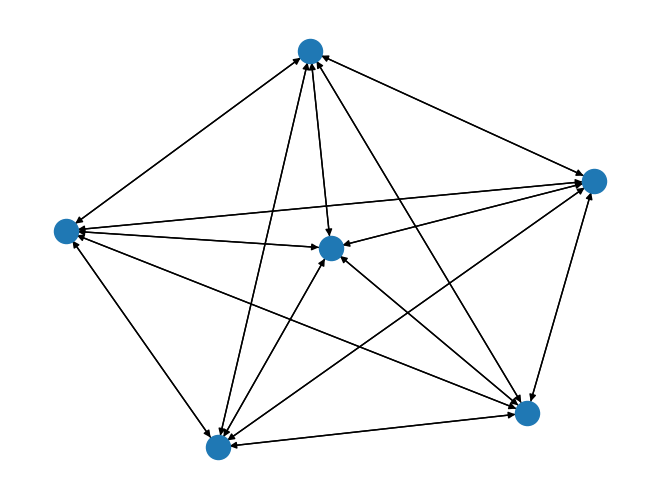

In [86]:
# 1. try to reverse it:
Dnet = nx.DiGraph()
for i in range(6):
    for j in range(6):
        if i != j:
            Dnet.add_edge(i, j, weight=1)
            Dnet.add_edge(j, i, weight=1)
nx.draw(Dnet)
original = nx.to_numpy_array(Dnet).T
print(f"the original matrix: \n {original}")

# the cocitation network
co = network_similarity(Dnet)
co_adj = nx.to_numpy_array(co).T
# fix the diagonal
np.fill_diagonal(co_adj, 0)
print(f"the cocitation network: \n {co_adj}")

# the bibliographic network
bi = network_similarity(Dnet, mode="bi")
bi_adj = nx.to_numpy_array(bi).T
# fix the diagonal
np.fill_diagonal(bi_adj, 0)
print(f"the bibliographic network: \n {bi_adj}")


In [79]:
# 2. example of same cocitaiton and bibliographic networks:
newG1 = nx.DiGraph()
newG1.add_weighted_edges_from([(1,2, 1), (2,3, 1), (3,1, 1),(2,1, 1),(3,2, 1),(1,3, 1)])
newG2 = nx.DiGraph()
newG2.add_weighted_edges_from([(1,2, 1),(2,3, 1), (3,1, 1),(2,1, 1),(3,2, 1),(1,3,1)])

co1 = network_similarity(newG1)
co2 = network_similarity(newG2)
bi1 = network_similarity(newG1, mode="bi")
bi2 = network_similarity(newG2, mode='bi')

cdiff = nx.to_numpy_array(co1).T - nx.to_numpy_array(co2).T
bdiff = nx.to_numpy_array(bi1).T - nx.to_numpy_array(bi2).T

print(f"The differences between cocitation network is {cdiff.sum().sum()},and the difference between bibliographic network is {bdiff.sum().sum()}, only when the two networks are square matrix and identifical")

The differences between cocitation network is 0.0,and the difference between bibliographic network is 0.0, only when the two networks are square matrix and identifical


### Section 6.4.2 Acyclic Networks
A new function to determine acyclic or not.

In [44]:
def acyclic_detect(file_path):
    """
    A algorithm to make decision if the network is acyclic network
    -------------------
    Input:
        file_path: str
            the file path
    -------------------
    Output:
        result: str
            Acyclic or Cyclic
    """
    G=nx.read_weighted_edgelist(file_path, create_using=nx.DiGraph)
    # vertex with no outgoing edges
    no_out = []
    G_itera = G.copy()

    i=0
    while G_itera.order() >0:
        while i < G_itera.number_of_nodes():
            if G_itera.out_degree(list(G_itera.nodes)[i])>0:
                i+=1
            else:
                G_itera.remove_node(list(G_itera.nodes)[i])
                i=0
        if G_itera.number_of_nodes() > 0:
            return "Cyclic"
    else:
        return "Acyclic"

    
for i in range(1,4):
    path = 'acyclic'+str(i)+'.edgelist'
    print(acyclic_detect(path))

Acyclic
Acyclic
Cyclic


### Section 6.6 Bipartite Networks


In [ ]:
B = nx.read_gml('2013-actor-movie-bipartite.gml', 'name')


### Section 6.7 Trees